Дан набор данных **train_df**

Поля, начинающиеся на “cat_” - категориальные. Поля, начинающиеся на “num_” - числовые. gb - target 

Построить модель классификации.

In [ ]:
# импорт библиотек
import numpy as np
import pandas as pd

In [ ]:
# изменение вида отображаемых результатов
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
# чтение данных
X=pd.read_csv('train_df.csv', delimiter="\t")

In [ ]:
X

,Unnamed: 0,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,cat_10,num_31,num_32,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,cat_11,cat_12,num_42,cat_13,num_43,num_44,num_45,cat_14,cat_15,num_46,num_47,num_48,num_49,num_50,num_51,num_52,num_53,num_54,cat_16,num_55,num_56,num_57,cat_17,num_58,cat_18,num_59,num_60,num_61,num_62,num_63,num_64,num_65,cat_19,num_66,num_67,num_68,num_69,num_70,num_71,cat_20,num_72,num_73,num_74,num_75,num_76,cat_21,num_77,num_78,cat_22,num_79,cat_23,cat_24,num_80,num_81,cat_25,num_82,cat_26,cat_27,cat_28,num_83,num_84,num_85,cat_29,num_86,num_87,num_88,num_89,num_90,cat_30,num_91,cat_31,cat_32,num_92,num_93,num_94,num_95,num_96,num_97,num_98,num_99,num_100,num_101,cat_33,num_102,num_103,num_104,num_105,num_106,num_107,num_108,num_109,num_110,num_111,num_112,cat_34,num_113,num_114,num_115,cat_35,num_116,num_117,num_118,num_119,cat_36,num_120,cat_37,num_121,num_122,cat_38,cat_39,num_123,num_124,num_125,num_126,num_127,num_128,num_129,num_130,num_131,num_132,num_133,num_134,cat_40,cat_41,cat_42,num_135,cat_43,num_136,num_137,num_138,num_139,cat_44,cat_45,cat_46,num_140,num_141,cat_47,num_142,num_143,num_144,cat_48,cat_49,cat_50,num_145,num_146,num_147,num_148,num_149,num_150,cat_51,num_151,cat_52,num_152,cat_53,num_153,num_154,num_155,num_156,num_157,cat_54,num_158,num_159,num_160,num_161,num_162,num_163,num_164,num_165,num_166,num_167,num_168,cat_55,num_169,num_170,num_171,num_172,num_173,cat_56,num_174,num_175,num_176,num_177,num_178,num_179,num_180,num_181,num_182,num_183,num_184,cat_57,num_185,cat_58,num_186,num_187,num_188,cat_59,cat_60,num_189,...,num_230,num_231,num_232,cat_75,num_233,num_234,cat_76,num_235,cat_77,num_236,num_237,num_238,cat_78,num_239,cat_79,num_240,num_241,num_242,cat_80,num_243,num_244,cat_81,cat_82,num_245,cat_83,num_246,num_247,num_248,num_249,num_250,num_251,num_252,num_253,num_254,num_255,num_256,cat_84,cat_85,num_257,cat_86,num_258,num_259,cat_87,cat_88,num_260,num_261,num_262,cat_89,num_263,cat_90,cat_91,cat_92,num_264,num_265,num_266,num_267,num_268,num_269,num_270,num_271,cat_93,num_272,num_273,num_274,cat_94,cat_95,num_275,cat_96,num_276,num_277,num_278,num_279,cat_97,num_280,num_281,num_282,num_283,num_284,num_285,num_286,num_287,num_288,num_289,num_290,num_291,num_292,cat_98,num_293,num_294,num_295,num_296,cat_99,cat_100,num_297,num_298,num_299,num_300,num_301,cat_101,cat_102,num_302,cat_103,num_303,num_304,cat_104,cat_105,num_305,num_306,num_307,num_308,num_309,num_310,num_311,num_312,num_313,num_314,cat_106,num_315,cat_107,num_316,cat_108,num_317,num_318,num_319,num_320,num_321,num_322,num_323,num_324,num_325,num_326,cat_109,cat_110,num_327,num_328,cat_111,cat_112,num_329,num_330,num_331,num_332,num_333,num_334,num_335,num_336,num_337,num_338,num_339,num_340,num_341,num_342,cat_113,num_343,num_344,num_345,cat_114,num_346,num_347,num_348,cat_115,num_349,cat_116,cat_117,num_350,cat_118,num_351,num_352,num_353,num_354,num_355,num_356,num_357,num_358,num_359,num_360,num_361,num_362,num_363,num_364,num_365,num_366,num_367,cat_119,num_368,cat_120,num_369,num_370,num_371,num_372,num_373,num_374,num_375,cat_121,num_376,num_377,num_378,num_379,num_380,num_381,num_382,num_383,num_384,num_385,num_386,cat_122,num_387,cat_123,cat_124,num_388,num_389,num_390,num_391,cat_125,num_392,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,id,gb
0,0,1377.3,3712.9,NaN,1303.0,2409.0,1281.7,43.0,1,195.0,NaN,27.4,NaN,417.1,2210.0,12970.8,0.0,343.3,0.6,NaN,11327.5,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,60.0,-10446.6,1,559.600,18598389.68,1,1,1,74742.52,1,1,NaN

# Анализ и чистка данных

In [ ]:
# вывод типа данных
X.dtypes

Unnamed: 0      int64
num_1         float64
num_2         float64
num_3         float64
num_4         float64
               ...   
num_416       float64
cat_134         int64
cat_135         int64
id              int64
gb              int64
Length: 554, dtype: object

In [ ]:
# вывод размера таблицы исходных данных
X.shape

(26824, 554)

In [ ]:
# проверка на наличие дубликатов строк. 
# результат - False по всем 26824 строкам, т.е. дублей строк нет.
X.duplicated().value_counts()

False    26824
dtype: int64

In [ ]:
# проверка отсутствующих значений. результат - множество Nan значений, далее будет проведена работа по их чистке и замене.
X.isnull().sum()

Unnamed: 0        0
num_1          3796
num_2          3871
num_3         26761
num_4             8
              ...  
num_416           8
cat_134           0
cat_135           0
id                0
gb                0
Length: 554, dtype: int64

In [ ]:
# проверим корреляцию столбцов 'Unnamed: 0' и 'id' с таргетовым 'gb'
for_corr = X[['Unnamed: 0', 'id','gb']]

In [ ]:
for_corr.corr()

,Unnamed: 0,id,gb
Unnamed: 0,1.000000,0.379165,-0.008097
id,0.379165,1.000000,0.004048
gb,-0.008097,0.004048,1.000000


In [ ]:
# тепловая карта матрицы корреляции
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

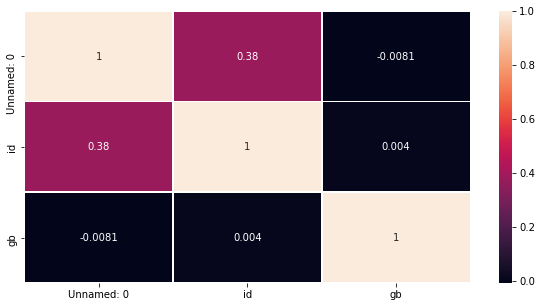

In [ ]:
corr = for_corr.corr()
f, ax = plt.subplots(figsize=(10, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,linewidths=.5, annot= True)

корелляция данных столбцов 'Unnamed: 0' и 'id' с данными таргета 'gb' очень слабая (при этом между собой 'Unnamed: 0' и 'id' кореллируют), эти данные похожи на порядковые номера, уникальные номера пользователей и т.п.. Исключим их из дальнейшего анализа.

In [ ]:
# удалим столбец "Unnamed: 0" и 'id' 

X.drop(['Unnamed: 0','id'], inplace=True, axis=1)

In [ ]:
X.head(8)

,num_1,num_2,num_3,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,cat_2,num_24,cat_3,cat_4,num_25,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,cat_10,num_31,num_32,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,cat_11,cat_12,num_42,cat_13,num_43,num_44,num_45,cat_14,cat_15,num_46,num_47,num_48,num_49,num_50,num_51,num_52,num_53,num_54,cat_16,num_55,num_56,num_57,cat_17,num_58,cat_18,num_59,num_60,num_61,num_62,num_63,num_64,num_65,cat_19,num_66,num_67,num_68,num_69,num_70,num_71,cat_20,num_72,num_73,num_74,num_75,num_76,cat_21,num_77,num_78,cat_22,num_79,cat_23,cat_24,num_80,num_81,cat_25,num_82,cat_26,cat_27,cat_28,num_83,num_84,num_85,cat_29,num_86,num_87,num_88,num_89,num_90,cat_30,num_91,cat_31,cat_32,num_92,num_93,num_94,num_95,num_96,num_97,num_98,num_99,num_100,num_101,cat_33,num_102,num_103,num_104,num_105,num_106,num_107,num_108,num_109,num_110,num_111,num_112,cat_34,num_113,num_114,num_115,cat_35,num_116,num_117,num_118,num_119,cat_36,num_120,cat_37,num_121,num_122,cat_38,cat_39,num_123,num_124,num_125,num_126,num_127,num_128,num_129,num_130,num_131,num_132,num_133,num_134,cat_40,cat_41,cat_42,num_135,cat_43,num_136,num_137,num_138,num_139,cat_44,cat_45,cat_46,num_140,num_141,cat_47,num_142,num_143,num_144,cat_48,cat_49,cat_50,num_145,num_146,num_147,num_148,num_149,num_150,cat_51,num_151,cat_52,num_152,cat_53,num_153,num_154,num_155,num_156,num_157,cat_54,num_158,num_159,num_160,num_161,num_162,num_163,num_164,num_165,num_166,num_167,num_168,cat_55,num_169,num_170,num_171,num_172,num_173,cat_56,num_174,num_175,num_176,num_177,num_178,num_179,num_180,num_181,num_182,num_183,num_184,cat_57,num_185,cat_58,num_186,num_187,num_188,cat_59,cat_60,num_189,cat_61,...,num_229,num_230,num_231,num_232,cat_75,num_233,num_234,cat_76,num_235,cat_77,num_236,num_237,num_238,cat_78,num_239,cat_79,num_240,num_241,num_242,cat_80,num_243,num_244,cat_81,cat_82,num_245,cat_83,num_246,num_247,num_248,num_249,num_250,num_251,num_252,num_253,num_254,num_255,num_256,cat_84,cat_85,num_257,cat_86,num_258,num_259,cat_87,cat_88,num_260,num_261,num_262,cat_89,num_263,cat_90,cat_91,cat_92,num_264,num_265,num_266,num_267,num_268,num_269,num_270,num_271,cat_93,num_272,num_273,num_274,cat_94,cat_95,num_275,cat_96,num_276,num_277,num_278,num_279,cat_97,num_280,num_281,num_282,num_283,num_284,num_285,num_286,num_287,num_288,num_289,num_290,num_291,num_292,cat_98,num_293,num_294,num_295,num_296,cat_99,cat_100,num_297,num_298,num_299,num_300,num_301,cat_101,cat_102,num_302,cat_103,num_303,num_304,cat_104,cat_105,num_305,num_306,num_307,num_308,num_309,num_310,num_311,num_312,num_313,num_314,cat_106,num_315,cat_107,num_316,cat_108,num_317,num_318,num_319,num_320,num_321,num_322,num_323,num_324,num_325,num_326,cat_109,cat_110,num_327,num_328,cat_111,cat_112,num_329,num_330,num_331,num_332,num_333,num_334,num_335,num_336,num_337,num_338,num_339,num_340,num_341,num_342,cat_113,num_343,num_344,num_345,cat_114,num_346,num_347,num_348,cat_115,num_349,cat_116,cat_117,num_350,cat_118,num_351,num_352,num_353,num_354,num_355,num_356,num_357,num_358,num_359,num_360,num_361,num_362,num_363,num_364,num_365,num_366,num_367,cat_119,num_368,cat_120,num_369,num_370,num_371,num_372,num_373,num_374,num_375,cat_121,num_376,num_377,num_378,num_379,num_380,num_381,num_382,num_383,num_384,num_385,num_386,cat_122,num_387,cat_123,cat_124,num_388,num_389,num_390,num_391,cat_125,num_392,num_393,cat_126,cat_127,cat_128,cat_129,num_394,num_395,num_396,num_397,cat_130,num_398,num_399,num_400,num_401,cat_131,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,gb
0,1377.3,3712.9,NaN,1303.0,2409.0,1281.7,43.0,1,195.0,NaN,27.4,NaN,417.1,2210.0,12970.8,0.0,343.3,0.6,NaN,11327.5,NaN,NaN,NaN,NaN,1,NaN,1,1,NaN,60.0,-10446.6,1,559.6,18598389.68,1,1,1,74742.52,1,1,NaN,77

In [ ]:
# создадим num_df - датафрейм с числовыми данными
num_df=X.filter(like="num")
num_df

,num_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,num_10,num_11,num_12,num_13,num_14,num_15,num_16,num_17,num_18,num_19,num_20,num_21,num_22,num_23,num_24,num_25,num_26,num_27,num_28,num_29,num_30,num_31,num_32,num_33,num_34,num_35,num_36,num_37,num_38,num_39,num_40,num_41,num_42,num_43,num_44,num_45,num_46,num_47,num_48,num_49,num_50,num_51,num_52,num_53,num_54,num_55,num_56,num_57,num_58,num_59,num_60,num_61,num_62,num_63,num_64,num_65,num_66,num_67,num_68,num_69,num_70,num_71,num_72,num_73,num_74,num_75,num_76,num_77,num_78,num_79,num_80,num_81,num_82,num_83,num_84,num_85,num_86,num_87,num_88,num_89,num_90,num_91,num_92,num_93,num_94,num_95,num_96,num_97,num_98,num_99,num_100,num_101,num_102,num_103,num_104,num_105,num_106,num_107,num_108,num_109,num_110,num_111,num_112,num_113,num_114,num_115,num_116,num_117,num_118,num_119,num_120,num_121,num_122,num_123,num_124,num_125,num_126,num_127,num_128,num_129,num_130,num_131,num_132,num_133,num_134,num_135,num_136,num_137,num_138,num_139,num_140,num_141,num_142,num_143,num_144,num_145,num_146,num_147,num_148,num_149,num_150,num_151,num_152,num_153,num_154,num_155,num_156,num_157,num_158,num_159,num_160,num_161,num_162,num_163,num_164,num_165,num_166,num_167,num_168,num_169,num_170,num_171,num_172,num_173,num_174,num_175,num_176,num_177,num_178,num_179,num_180,num_181,num_182,num_183,num_184,num_185,num_186,num_187,num_188,num_189,num_190,num_191,num_192,num_193,num_194,num_195,num_196,num_197,num_198,num_199,num_200,num_201,num_202,num_203,num_204,num_205,num_206,num_207,num_208,num_209,num_210,num_211,num_212,num_213,num_214,num_215,num_216,num_217,num_218,num_219,num_220,num_221,num_222,num_223,num_224,num_225,num_226,num_227,num_228,num_229,num_230,num_231,num_232,num_233,num_234,num_235,num_236,num_237,num_238,num_239,num_240,num_241,num_242,num_243,num_244,num_245,num_246,num_247,num_248,num_249,num_250,num_251,num_252,num_253,num_254,num_255,num_256,num_257,num_258,num_259,num_260,num_261,num_262,num_263,num_264,num_265,num_266,num_267,num_268,num_269,num_270,num_271,num_272,num_273,num_274,num_275,num_276,num_277,num_278,num_279,num_280,num_281,num_282,num_283,num_284,num_285,num_286,num_287,num_288,num_289,num_290,num_291,num_292,num_293,num_294,num_295,num_296,num_297,num_298,num_299,num_300,num_301,num_302,num_303,num_304,num_305,num_306,num_307,num_308,num_309,num_310,num_311,num_312,num_313,num_314,num_315,num_316,num_317,num_318,num_319,num_320,num_321,num_322,num_323,num_324,num_325,num_326,num_327,num_328,num_329,num_330,num_331,num_332,num_333,num_334,num_335,num_336,num_337,num_338,num_339,num_340,num_341,num_342,num_343,num_344,num_345,num_346,num_347,num_348,num_349,num_350,num_351,num_352,num_353,num_354,num_355,num_356,num_357,num_358,num_359,num_360,num_361,num_362,num_363,num_364,num_365,num_366,num_367,num_368,num_369,num_370,num_371,num_372,num_373,num_374,num_375,num_376,num_377,num_378,num_379,num_380,num_381,num_382,num_383,num_384,num_385,num_386,num_387,num_388,num_389,num_390,num_391,num_392,num_393,num_394,num_395,num_396,num_397,num_398,num_399,num_400,num_401,num_402,num_403,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,num_414,num_415,num_416
0,1377.3,3712.9,NaN,1303.0,2409.0,1281.7,43.0,195.0,NaN,27.4,NaN,417.1,2210.0,12970.8,0.0,343.3,0.6,NaN,11327.5,NaN,NaN,NaN,NaN,NaN,NaN,60.0,-10446.6,559.600,18598389.68,74742.52,NaN,7768369.20,559.600,NaN,NaN,NaN,NaN,-1142.4,NaN,31.0,498892.16,NaN,2446146.85,NaN,11306764.14,NaN,NaN,NaN,NaN,1371743.0,NaN,0.10,-1027763.45,2102.1,0.02,NaN,18.03,795055.02,0.08,500000.0,NaN,26672630.02,NaN,458.400,NaN,NaN,0.0,7933.3,7933.3,6675.8,9506.6,0.0,NaN,22.8,1307.0,NaN,17.0,NaN,-99.80,11728.9,11589.0,NaN,7933.3,195.0,-25.3,NaN,3394.2,0.00,NaN,NaN,NaN,46913.20,NaN,2898.9,0.0,NaN,5.0,0.0,NaN,NaN,NaN,50000.0,NaN,33.3,-440123.53,NaN,28333733.29,NaN,NaN,3303.2,3303.2,28.68,11327.5,1820.9,0.0,NaN,7933.3,NaN,2544058.39,500000.00,NaN,0.0,1.0,11728.3,NaN,NaN,NaN,5.517000e-01,2270.0,39184.65

In [ ]:
# проверка типов данных числового датафрейма
num_df.dtypes.unique()

array([dtype('float64')], dtype=object)

In [ ]:
# создадим cat_df - датафрейм с категориальными данными
cat_df=X.filter(like="cat")
cat_df

,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cat_24,cat_25,cat_26,cat_27,cat_28,cat_29,cat_30,cat_31,cat_32,cat_33,cat_34,cat_35,cat_36,cat_37,cat_38,cat_39,cat_40,cat_41,cat_42,cat_43,cat_44,cat_45,cat_46,cat_47,cat_48,cat_49,cat_50,cat_51,cat_52,cat_53,cat_54,cat_55,cat_56,cat_57,cat_58,cat_59,cat_60,cat_61,cat_62,cat_63,cat_64,cat_65,cat_66,cat_67,cat_68,cat_69,cat_70,cat_71,cat_72,cat_73,cat_74,cat_75,cat_76,cat_77,cat_78,cat_79,cat_80,cat_81,cat_82,cat_83,cat_84,cat_85,cat_86,cat_87,cat_88,cat_89,cat_90,cat_91,cat_92,cat_93,cat_94,cat_95,cat_96,cat_97,cat_98,cat_99,cat_100,cat_101,cat_102,cat_103,cat_104,cat_105,cat_106,cat_107,cat_108,cat_109,cat_110,cat_111,cat_112,cat_113,cat_114,cat_115,cat_116,cat_117,cat_118,cat_119,cat_120,cat_121,cat_122,cat_123,cat_124,cat_125,cat_126,cat_127,cat_128,cat_129,cat_130,cat_131,cat_132,cat_133,cat_134,cat_135
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,2,1,2,2,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,2,1,2,2,2,1,1,1,2,1,1,1,2,1,1,1,2,1,2,1,1,1,1,1,1,2,2,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,2,2,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1
2,1,2,2,1,1,1,1,1,2,1,1,1,1,3,1,1,1,1,3,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,3,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,1,1,1,1,2,1,2,2,3,1,1,2,3,1,1,1,3,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,3,1,1,1,1,1,1,1,1,2,1,2,3,1,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,1
3,1,1,1,1,1,1,1,1,2,1,1,1,1,3,2,1,1,1,4,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,4,3,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,3,1,1,4,1,1,1,1,1,1,1,2,4,1,1,1,4,1,2,1,4,1,1,1,2,1,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,4,1
4,1,1,1,1,1,1,1,1,2,1,1,1,1,4,1,3,1,1,5,1,3,1,1,2,1,1,3,1,1,1,1,1,1,1,1,1,1,5,3,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,4,1,2,3,1,1,1,1,2,1,1,2,1,1,1,1,4,1,1,1,5,1,1,1,1,2,2,1,1,1,1,1,1,2,1,1,1,1,1,1,1,4,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26819,1,1,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,1,5,2,1,1,1,1,1,2,1,3,1,77,3,2,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1313,1,3,1,1,2,1,1,2,7,2,1,1,4,1,2,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,2,17,1,1,1,1,1,1,1,2,2,1,2,1,1,1,2,1,1,1,1,1,2,2,2,1,1,1,2,1,1,1,1,1,1,1,1,7,1
26820,1,1,1,1,1,1,1,1,2,1,1,1,1,2,1,2,1,1,2,1,2,1,1,1,1,1,2,2,1,1,1,1,1,2,1,2,1,172,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,7,1,2,915,1,2,1,1,2,1,2,2,7,2,1,1,8,1,1,1,2,1,1,1,2,1,2,2,1,1,1,1,1,2,1,2,1,1,1,1,1,872,1,1,1,1,1,1,1,2,2,1,2,2,1,1,1,1,1,2,1,1,2,2,2,1,1,1,1,1,1,2,1,1,1,1,1,5,1
26821,1,2,1,1,2,1,1,1,3,1,1,1,1,1,2,1,1,1,89,1,8,1,1,2,1,1,1,2,1,1,1,1,1,2,1,2,1,45,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,914,1,2,1,1,4,1,1,2,7,2,1,1,6,1,1,1,7,1,1,1,1,2,1,1,1,1,2,1,2,2,1,2,1,1,1,1,2,807,1,3,1,1,1,1,1,1,1,1,2,2,2,1,3,2,1,3,1,1,1,2,1,1,2,1,1,1,1,2,1,1,1,1,2,3,1
26822,1,1,2,1,1,1,1,1,2,1,1,1,1,4,2,1,1,1,2,1,1,1,1,4,1,1,2,2,1,1,1,1,1,2,1,2,1,35,2,2,1,1,2,1,3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,423,1,2,1,1,2,1,2,2,7,2,1,1,3,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,2,17,1,1,1,1,1,1,1,1,1,2,2,3,1,1,1,1,1,1,1,1,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,4,

In [ ]:
# проверка типов данных категориального датафрейма
cat_df.dtypes.unique()

array([dtype('int64')], dtype=object)

In [ ]:
# проверка категорийных данных на уникальность. В случае если столбец имеет единственную категорию его можно будет исключить.
# результат - таковых не оказалось
nul_cat_df = pd.DataFrame(cat_df.isnull().sum(axis = 0)==1)
nul_cat_df[(nul_cat_df[0] == True)]

,0


In [ ]:
# создадим функцию подсчета количества Nan значений и их % от общего количества данных в каждом столбце 
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
# вывод пропущенных значений в исходнов датафрейме
mis_df = missing_values_table(X)
mis_df

Selected dataframe has 552 columns.
There are 334 columns that have missing values.


,Missing Values,% of Total Values
num_365,26824,100.0
num_250,26824,100.0
num_150,26824,100.0
num_152,26824,100.0
num_266,26824,100.0
num_392,26824,100.0
num_258,26824,100.0
num_23,26824,100.0
num_375,26824,100.0
num_242,26824,100.0


In [ ]:
# все Nan значения среди числовых данных (334 колонки с Nan, результат аналогичен результату отработки финкции по всему датасету Х)
missing_values_table(num_df)

Selected dataframe has 416 columns.
There are 334 columns that have missing values.


,Missing Values,% of Total Values
num_365,26824,100.0
num_250,26824,100.0
num_150,26824,100.0
num_152,26824,100.0
num_266,26824,100.0
num_392,26824,100.0
num_258,26824,100.0
num_23,26824,100.0
num_375,26824,100.0
num_242,26824,100.0


In [ ]:
# выберем числовые столбцы, в которых количество пропущеных/неизвестных значений более 50% и удалим их,
# если заменить (imputer) такое большое количества Nan значений на расчетные, это негативно повлияет на финальную модель
del_col = mis_df[mis_df["% of Total Values"] > 80]
del_col

,Missing Values,% of Total Values
num_365,26824,100.0
num_250,26824,100.0
num_150,26824,100.0
num_152,26824,100.0
num_266,26824,100.0
num_392,26824,100.0
num_258,26824,100.0
num_23,26824,100.0
num_375,26824,100.0
num_242,26824,100.0


In [ ]:
# удаление столбцов
X.drop(del_col.index, axis=1, inplace=True)

In [ ]:
# отделяем target от predict
Y=X.gb

In [ ]:
# удаляем столбец с target из df 
X.drop(['gb'], axis=1, inplace=True)

# Построение моделей и оценка результата (прогноза)

In [ ]:
# импорт библиотек
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# разделим набор данных на обучающий и проверочный
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [ ]:
# столбцы с пропущенными значениями
cols_with_mis=[col for col in X.columns if X[col].isnull().any()]

In [ ]:
# вывод столбцов с пропущенными значениями
cols_with_mis

['num_1',
 'num_2',
 'num_4',
 'num_5',
 'num_7',
 'num_8',
 'num_9',
 'num_10',
 'num_12',
 'num_13',
 'num_14',
 'num_15',
 'num_16',
 'num_17',
 'num_26',
 'num_27',
 'num_29',
 'num_30',
 'num_31',
 'num_32',
 'num_34',
 'num_38',
 'num_40',
 'num_41',
 'num_43',
 'num_45',
 'num_52',
 'num_53',
 'num_54',
 'num_55',
 'num_57',
 'num_58',
 'num_59',
 'num_60',
 'num_62',
 'num_67',
 'num_74',
 'num_75',
 'num_76',
 'num_77',
 'num_79',
 'num_80',
 'num_81',
 'num_84',
 'num_85',
 'num_88',
 'num_94',
 'num_95',
 'num_97',
 'num_98',
 'num_102',
 'num_104',
 'num_105',
 'num_107',
 'num_112',
 'num_115',
 'num_119',
 'num_120',
 'num_122',
 'num_123',
 'num_124',
 'num_129',
 'num_130',
 'num_132',
 'num_133',
 'num_134',
 'num_136',
 'num_137',
 'num_139',
 'num_141',
 'num_144',
 'num_145',
 'num_147',
 'num_148',
 'num_151',
 'num_153',
 'num_154',
 'num_155',
 'num_158',
 'num_159',
 'num_160',
 'num_162',
 'num_164',
 'num_167',
 'num_168',
 'num_169',
 'num_170',
 'num_172',
 

In [ ]:
# делаем копию чтобы избежать изменения исходных  данных
X_train_plus=X_train.copy()
X_valid_plus=X_valid.copy()

In [ ]:
# создание новых столбцов пропущенных значений
for col in cols_with_mis:
    X_train_plus[col+'_was_mis']=X_train_plus[col].isnull()
    X_valid_plus[col+'_was_mis']=X_valid_plus[col].isnull()

In [ ]:
# замена Nan значений
# в идеале необходимо понимать смысл каждого столбца и почему указано значение Nan, оно может быть пропущено 
# или вовсе не существовать (напр наличие 2го ребенка в семье без детей)
# будем считать, что в нашем случае значения существуют, но случайно пропущены. 
# проведом замену, стратегия замены - медианное знаяение столбца.

my_imputer=SimpleImputer(strategy='median')
imputed_X_train_plus=pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus=pd.DataFrame(my_imputer.fit_transform(X_valid_plus))

In [ ]:
# замена удаленных столбцов (возврат)
imputed_X_train_plus.columns=X_train_plus.columns
imputed_X_valid_plus.columns=X_valid_plus.columns

In [ ]:
imputed_X_train_plus

,num_1,num_2,num_4,num_5,num_6,num_7,cat_1,num_8,num_9,num_10,num_12,num_13,num_14,num_15,num_16,num_17,num_19,cat_2,cat_3,cat_4,num_26,num_27,cat_5,num_28,num_29,cat_6,cat_7,cat_8,num_30,cat_9,cat_10,num_31,num_32,num_33,num_34,num_38,num_40,num_41,cat_11,cat_12,cat_13,num_43,num_45,cat_14,cat_15,num_50,num_52,num_53,num_54,cat_16,num_55,num_57,cat_17,num_58,cat_18,num_59,num_60,num_62,num_64,cat_19,num_67,num_68,num_69,num_70,num_71,cat_20,num_72,num_74,num_75,num_76,cat_21,num_77,cat_22,num_79,cat_23,cat_24,num_80,num_81,cat_25,cat_26,cat_27,cat_28,num_83,num_84,num_85,cat_29,num_87,num_88,cat_30,cat_31,cat_32,num_92,num_94,num_95,num_97,num_98,cat_33,num_102,num_104,num_105,num_107,num_110,num_111,num_112,cat_34,num_113,num_114,num_115,cat_35,num_117,num_119,cat_36,num_120,cat_37,num_122,cat_38,cat_39,num_123,num_124,num_128,num_129,num_130,num_132,num_133,num_134,cat_40,cat_41,cat_42,cat_43,num_136,num_137,num_139,cat_44,cat_45,cat_46,num_141,cat_47,num_144,cat_48,cat_49,cat_50,num_145,num_147,num_148,cat_51,num_151,cat_52,cat_53,num_153,num_154,num_155,cat_54,num_158,num_159,num_160,num_161,num_162,num_164,num_165,num_167,num_168,cat_55,num_169,num_170,num_172,num_173,cat_56,num_174,num_175,num_176,num_177,num_178,num_179,num_180,num_181,num_183,num_184,cat_57,num_185,cat_58,num_186,num_187,num_188,cat_59,cat_60,cat_61,num_191,num_192,num_193,num_194,num_196,num_197,cat_62,num_200,num_201,cat_63,num_202,cat_64,cat_65,cat_66,num_203,num_204,num_205,num_206,cat_67,cat_68,num_209,cat_69,cat_70,num_211,cat_71,num_212,num_213,num_214,num_216,num_218,num_219,num_220,num_221,num_225,cat_72,cat_73,num_226,num_228,cat_74,num_229,num_230,num_231,num_232,cat_75,num_233,num_234,cat_76,num_235,cat_77,num_237,num_238,cat_78,num_239,cat_79,num_240,cat_80,num_244,cat_81,cat_82,cat_83,num_246,num_252,num_255,cat_84,...,num_351,num_352,num_353,num_354,num_355,num_356,num_357,num_358,num_359,num_360,num_361,num_364,num_366,num_367,cat_119,cat_120,num_370,num_371,num_372,num_373,cat_121,num_378,num_379,num_380,num_381,num_382,num_384,num_385,cat_122,num_387,cat_123,cat_124,num_389,cat_125,num_393,cat_126,cat_127,cat_128,cat_129,num_395,num_396,cat_130,num_398,num_400,cat_131,num_402,num_404,num_405,num_406,num_407,num_408,num_409,num_410,num_411,num_412,num_413,cat_132,cat_133,num_414,num_415,num_416,cat_134,cat_135,num_1_was_mis,num_2_was_mis,num_4_was_mis,num_5_was_mis,num_7_was_mis,num_8_was_mis,num_9_was_mis,num_10_was_mis,num_12_was_mis,num_13_was_mis,num_14_was_mis,num_15_was_mis,num_16_was_mis,num_17_was_mis,num_26_was_mis,num_27_was_mis,num_29_was_mis,num_30_was_mis,num_31_was_mis,num_32_was_mis,num_34_was_mis,num_38_was_mis,num_40_was_mis,num_41_was_mis,num_43_was_mis,num_45_was_mis,num_52_was_mis,num_53_was_mis,num_54_was_mis,num_55_was_mis,num_57_was_mis,num_58_was_mis,num_59_was_mis,num_60_was_mis,num_62_was_mis,num_67_was_mis,num_74_was_mis,num_75_was_mis,num_76_was_mis,num_77_was_mis,num_79_was_mis,num_80_was_mis,num_81_was_mis,num_84_was_mis,num_85_was_mis,num_88_was_mis,num_94_was_mis,num_95_was_mis,num_97_was_mis,num_98_was_mis,num_102_was_mis,num_104_was_mis,num_105_was_mis,num_107_was_mis,num_112_was_mis,num_115_was_mis,num_119_was_mis,num_120_was_mis,num_122_was_mis,num_123_was_mis,num_124_was_mis,num_129_was_mis,num_130_was_mis,num_132_was_mis,num_133_was_mis,num_134_was_mis,num_136_was_mis,num_137_was_mis,num_139_was_mis,num_141_was_mis,num_144_was_mis,num_145_was_mis,num_147_was_mis,num_148_was_mis,num_151_was_mis,num_153_was_mis,num_154_was_mis,num_155_was_mis,num_158_was_mis,num_159_was_mis,num_160_was_mis,num_162_was_mis,num_164_was_mis,num_167_was_mis,num_168_was_mis,num_169_was_mis,num_170_was_mis,num_172_was_mis,num_173_was_mis,num_177_was_mis,num_184_was_mis,num_185_was_mis,num_186_was_mis,num_187_was_mis,num_188_was_mis,num_191_was_mis,num_192_was_mis,num_193_was_mis,num_194_was_mis,num_196_was_mis,num_197_was_mis,num_200_was_mis,num_201_was_mis,num_202_was_mis,num_203_was_mis,num_204_was_mis,num_205_was_mis,n

In [ ]:
# Создание и оценка моделей
TestModels = pd.DataFrame()
tmp = {}

classifiers = [
    svm.SVR(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.LinearRegression(),
    linear_model.LogisticRegression(max_iter=4000)
    ]

for item in classifiers:
    my_model = item
    my_model.fit(imputed_X_train_plus, Y_train)
    predictions = my_model.predict(imputed_X_valid_plus)
    tmp['MAE'] = round(mean_absolute_error(predictions, Y_valid),3)
    tmp['MSE'] = round(mean_squared_error(predictions, Y_valid),3)
    TestModels = TestModels.append([tmp])

TestModels.index = ['SVR', 'BayesianRidge', 'LassoLars', 'ARDRegression', 'LinearRegression', 'LogisticRegression']
TestModels

,MAE,MSE
SVR,0.116,0.026
BayesianRidge,0.049,0.019
LassoLars,0.042,0.020
ARDRegression,0.042,0.020
LinearRegression,0.056,0.019
LogisticRegression,0.026,0.026


Таким образом наилучший прогноз (минимальная среднеабсолютная и низкая среднеквадратическая ошибка) дает модель LogisticRegression.

In [ ]:
# оценка точности прогноза финальной модели
my_model_fin=linear_model.LogisticRegression(max_iter=4000)
my_model_fin.fit(imputed_X_train_plus, Y_train)
predictions_fin = my_model_fin.predict(imputed_X_valid_plus)

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy_score:', round(accuracy_score(Y_valid, predictions_fin)*100,2))

accuracy_score: 97.37


Точность прогноза модели LogisticRegression составляет: 97.37%